* IBM sample datasets
https://www.kaggle.com/blastchar/telco-customer-churn

* Demographic info: 
    * Gender, SeniorCitizen, Partner, Dependents
* Services subscribed: 
    * PhoneService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
* Customer account info:
    * CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

## load dataset

In [29]:
df = pd.read_csv("telco.csv")
df.shape

(7043, 21)

In [30]:
pd.options.display.max_columns = 22

In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [35]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### describe

In [36]:
# describe 로 미리보기 합니다.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [37]:
# describe 로 object 데이터를 미리보기 합니다.
# unique 값으로 범주형 데이터 파악
df.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,6985-HAYWX,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### 수치형 데이터 시각화

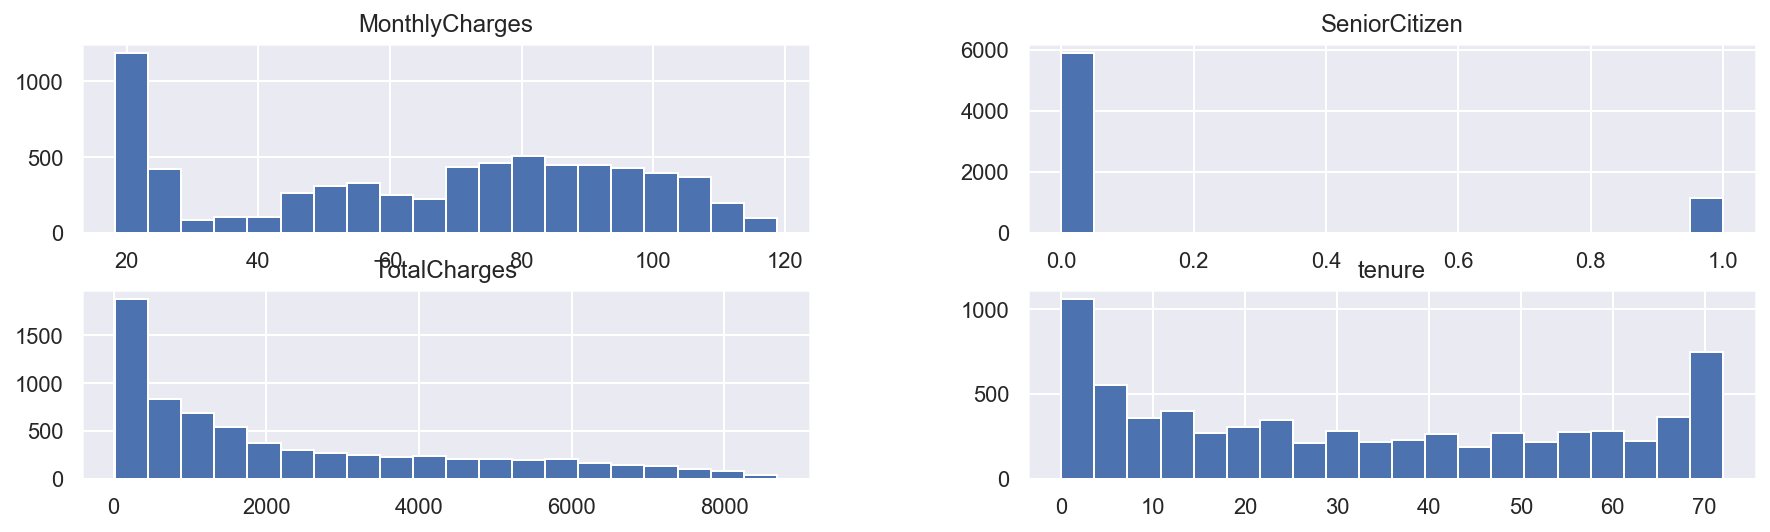

In [12]:
# pandas 의 hist 를 통해 수치 데이터의 히스토그램을 그립니다.
h = df.hist(bins=20, figsize=(15, 4))

In [13]:
df.shape

(7043, 21)

In [14]:
# 수치형 데이터만 가져와서 시각화를 할 수 있도록 na 값을 제거하고 df_numeric 이라는 변수에 담습니다.
df_numeric = df.select_dtypes(exclude="object").copy()
df_numeric["Churn"] = df["Churn"]
df_numeric = df_numeric.dropna()
df_numeric.shape

(7032, 5)

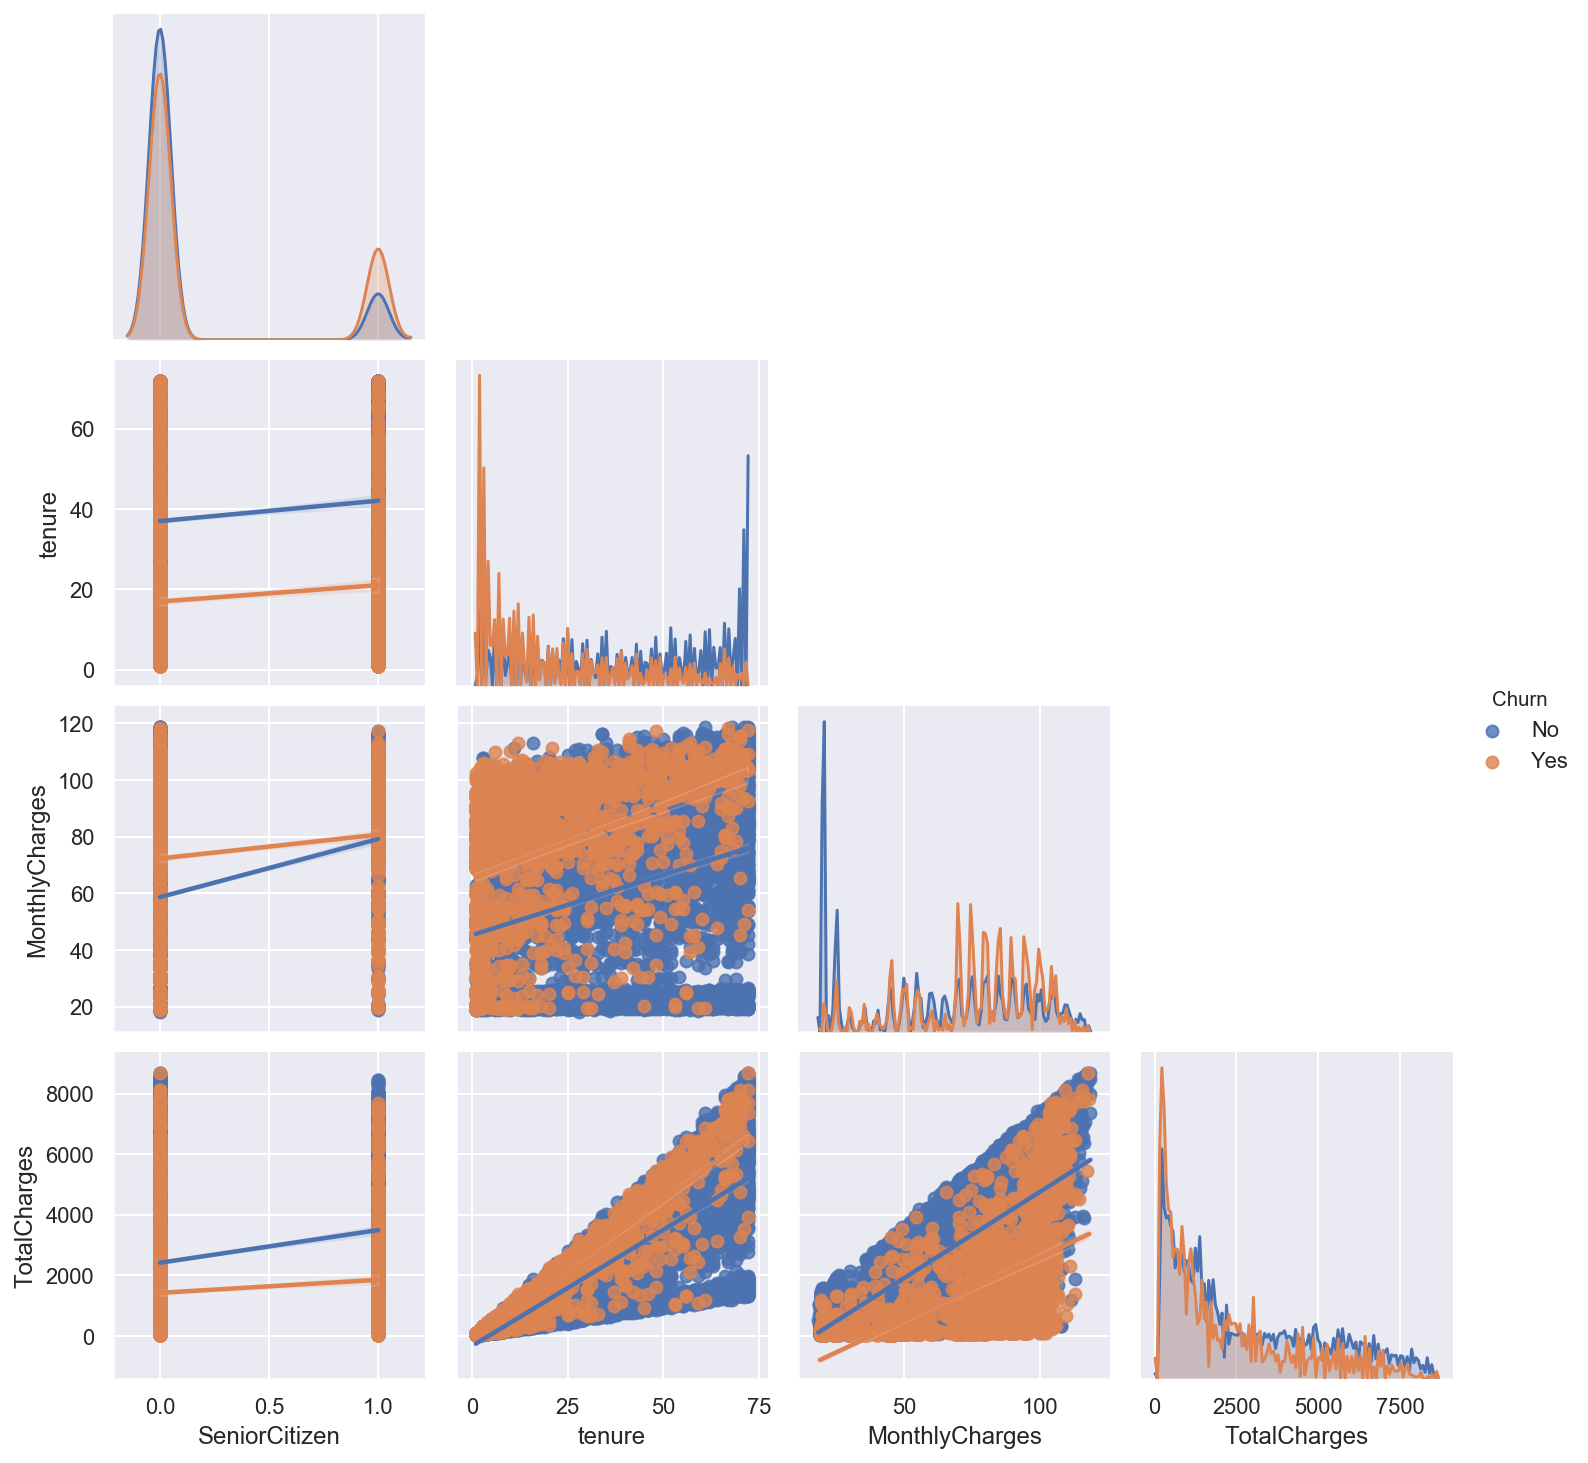

In [16]:
# pairplot 을 그립니다.
# bw에 대해 경고 메시지가 뜬다면 다음 옵션을 사용합니다. diag_kws={"bw":.05} ==> seaborn 이 최신버젼이 아니라서 생기는 오류 
# corner = True 는 대각선 한쪽만 그려준다 
sns.pairplot(df_numeric, hue="Churn", kind='reg', corner=True, diag_kws={"bw":.05})

### 범주형 데이터 시각화

In [17]:
nunique = df.nunique()
nunique

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [18]:
category_col = nunique[nunique < 10]
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [19]:
bi_category = nunique[nunique < 3]
bi_cols = bi_category.index.tolist()
bi_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

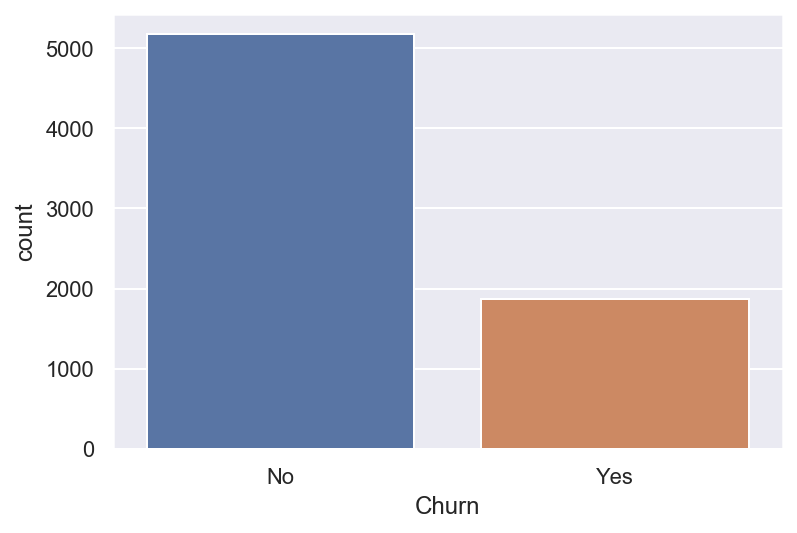

In [20]:
sns.countplot(data=df, x="Churn")

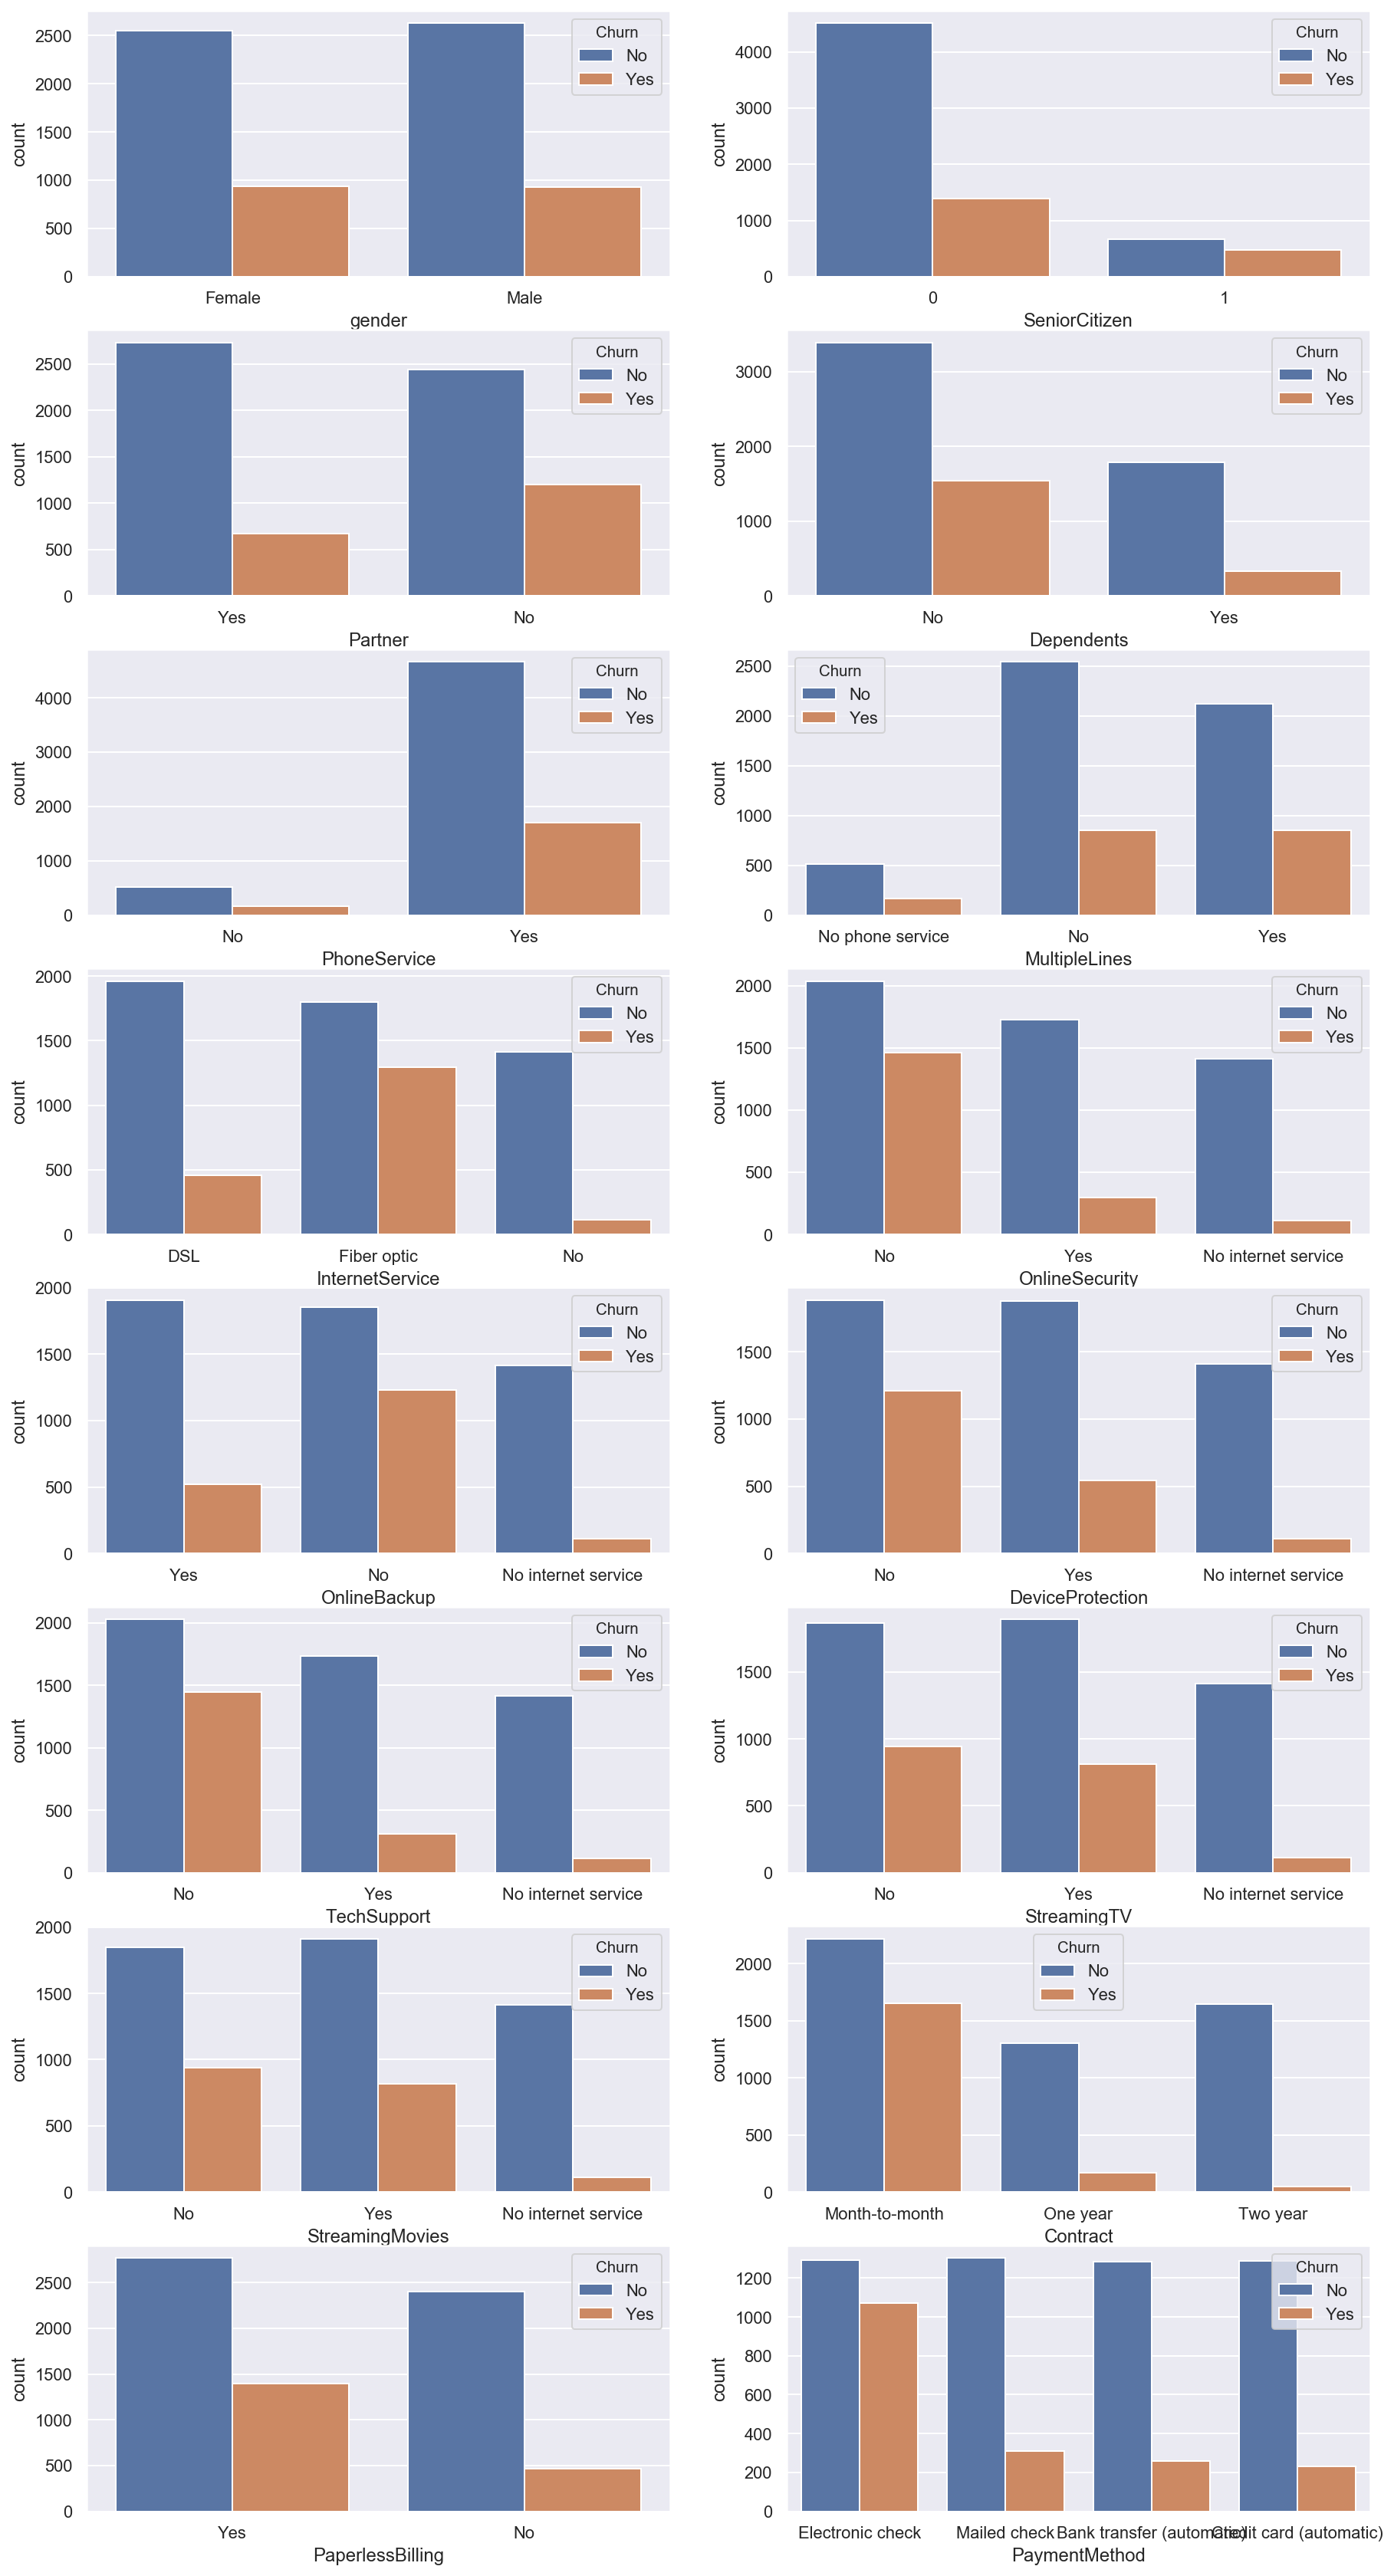

In [25]:
category_col_name = category_col.index.tolist()
col_len = len(category_col_name)

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 30))
for i, cat_col in enumerate(category_col_name[:-1]):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, x=cat_col, hue="Churn", ax=axes[row, col])
    # print(row, col)

In [22]:
df[bi_cols].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,Female,0,Yes,No,No,Yes,No
1,Male,0,No,No,Yes,No,No
2,Male,0,No,No,Yes,Yes,Yes
3,Male,0,No,No,No,No,No
4,Female,0,No,No,Yes,Yes,Yes


### 바이너리 변수에 대한 인코딩

In [40]:
# gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn
df["gender_bool"] = (df["gender"] == "Male")
df["Partner_bool"] = (df["Partner"] == "Yes")
df["Dependents_bool"] = (df["Dependents"] == "Yes")
df["PhoneService_bool"] = (df["PhoneService"] == "Yes")
df["PaperlessBilling_bool"] = (df["PaperlessBilling"] == "Yes")
df["Churn_bool"] = (df["Churn"] == "Yes")

In [41]:
df[bi_cols].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,Female,0,Yes,No,No,Yes,No
1,Male,0,No,No,Yes,No,No
2,Male,0,No,No,Yes,Yes,Yes
3,Male,0,No,No,No,No,No
4,Female,0,No,No,Yes,Yes,Yes


In [43]:
corr = df.corr()

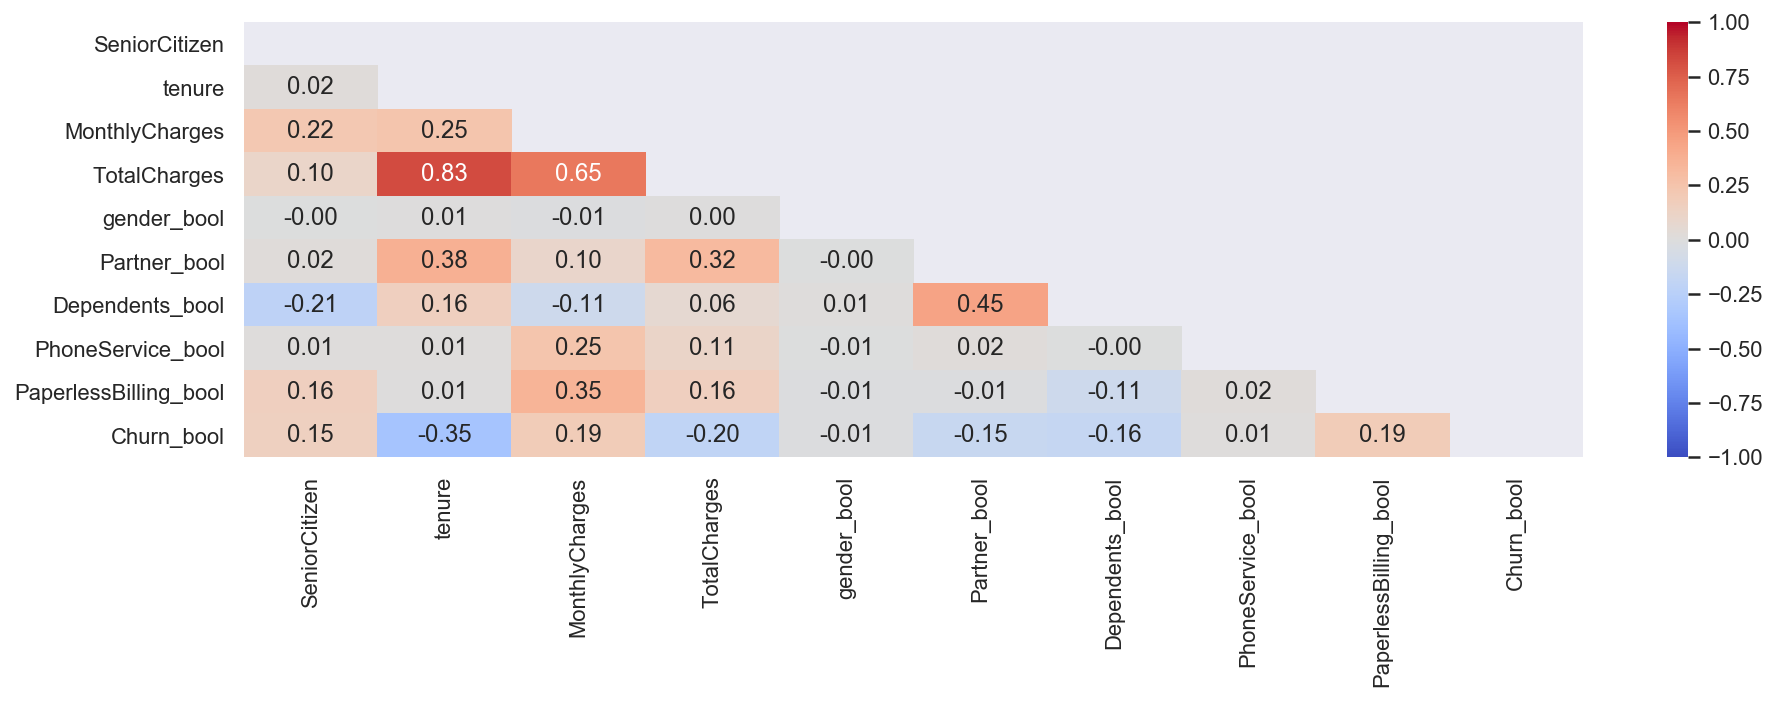

In [50]:
# 수치변수에 대한 상관계수 구해서 그리기
# corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(15, 4))


sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "coolwarm", vmin = -1, vmax = 1, mask = mask)



### 수치형 변수

In [51]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [52]:
cat_cols = nunique[( nunique > 2 ) & ( nunique < 10 )]
cat_cols = cat_cols.index.tolist()
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [53]:
df["Churn"]

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [54]:
df.groupby("Churn")[bi_cols].mean()

,SeniorCitizen
Churn,
No,0.128721
Yes,0.254682


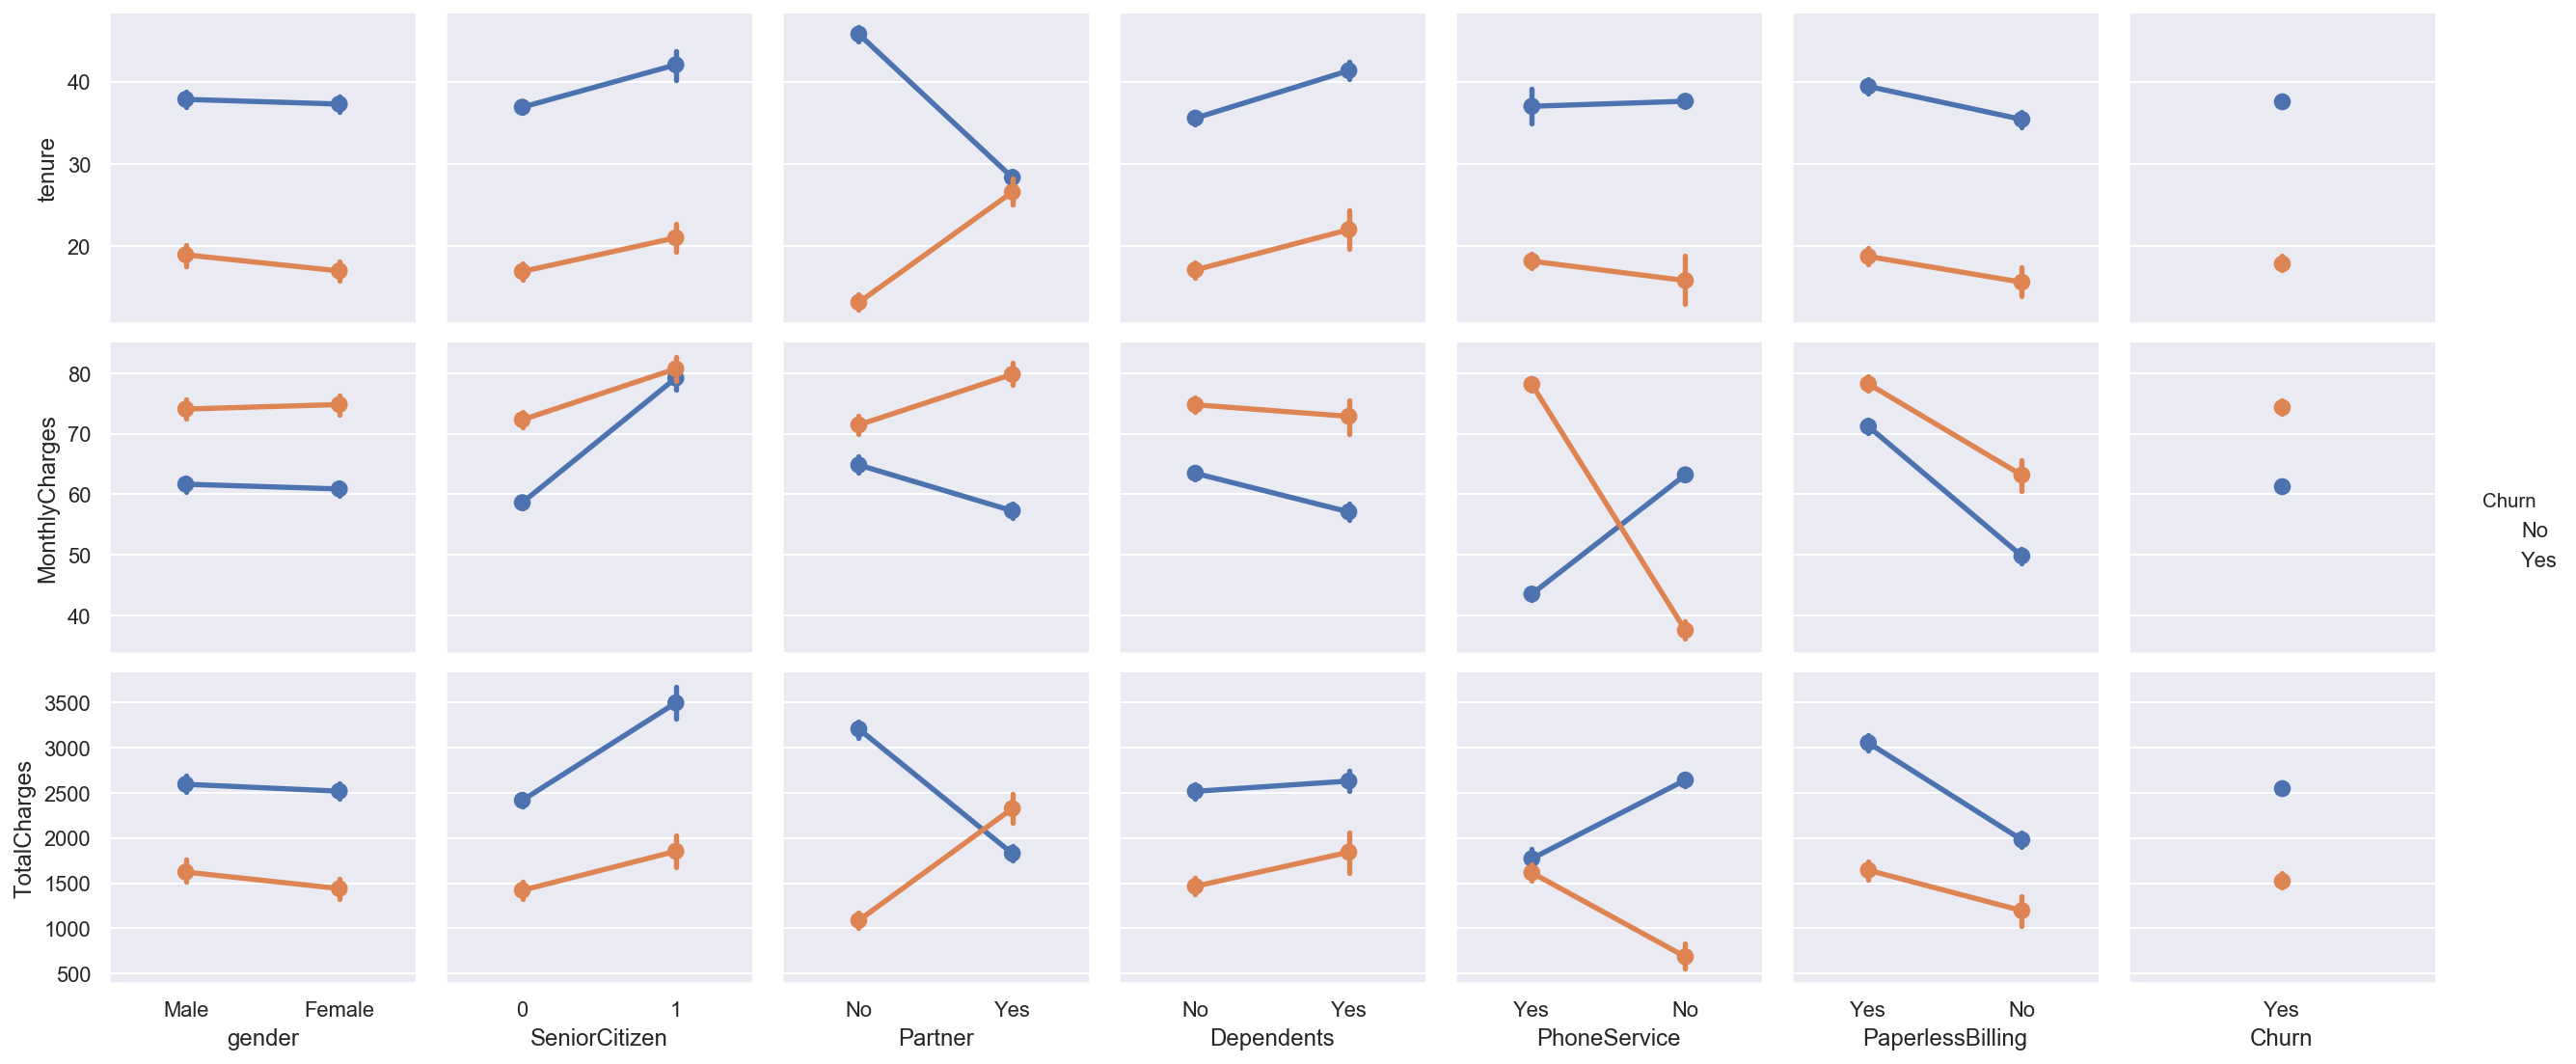

In [55]:
# x축, y축 한번에 그릴 떄, x_vars / y_vars  로 써주면 된다. 
g = sns.PairGrid(data=df, x_vars=bi_cols, y_vars=num_cols, hue="Churn")
g.map(sns.pointplot)
g.add_legend()

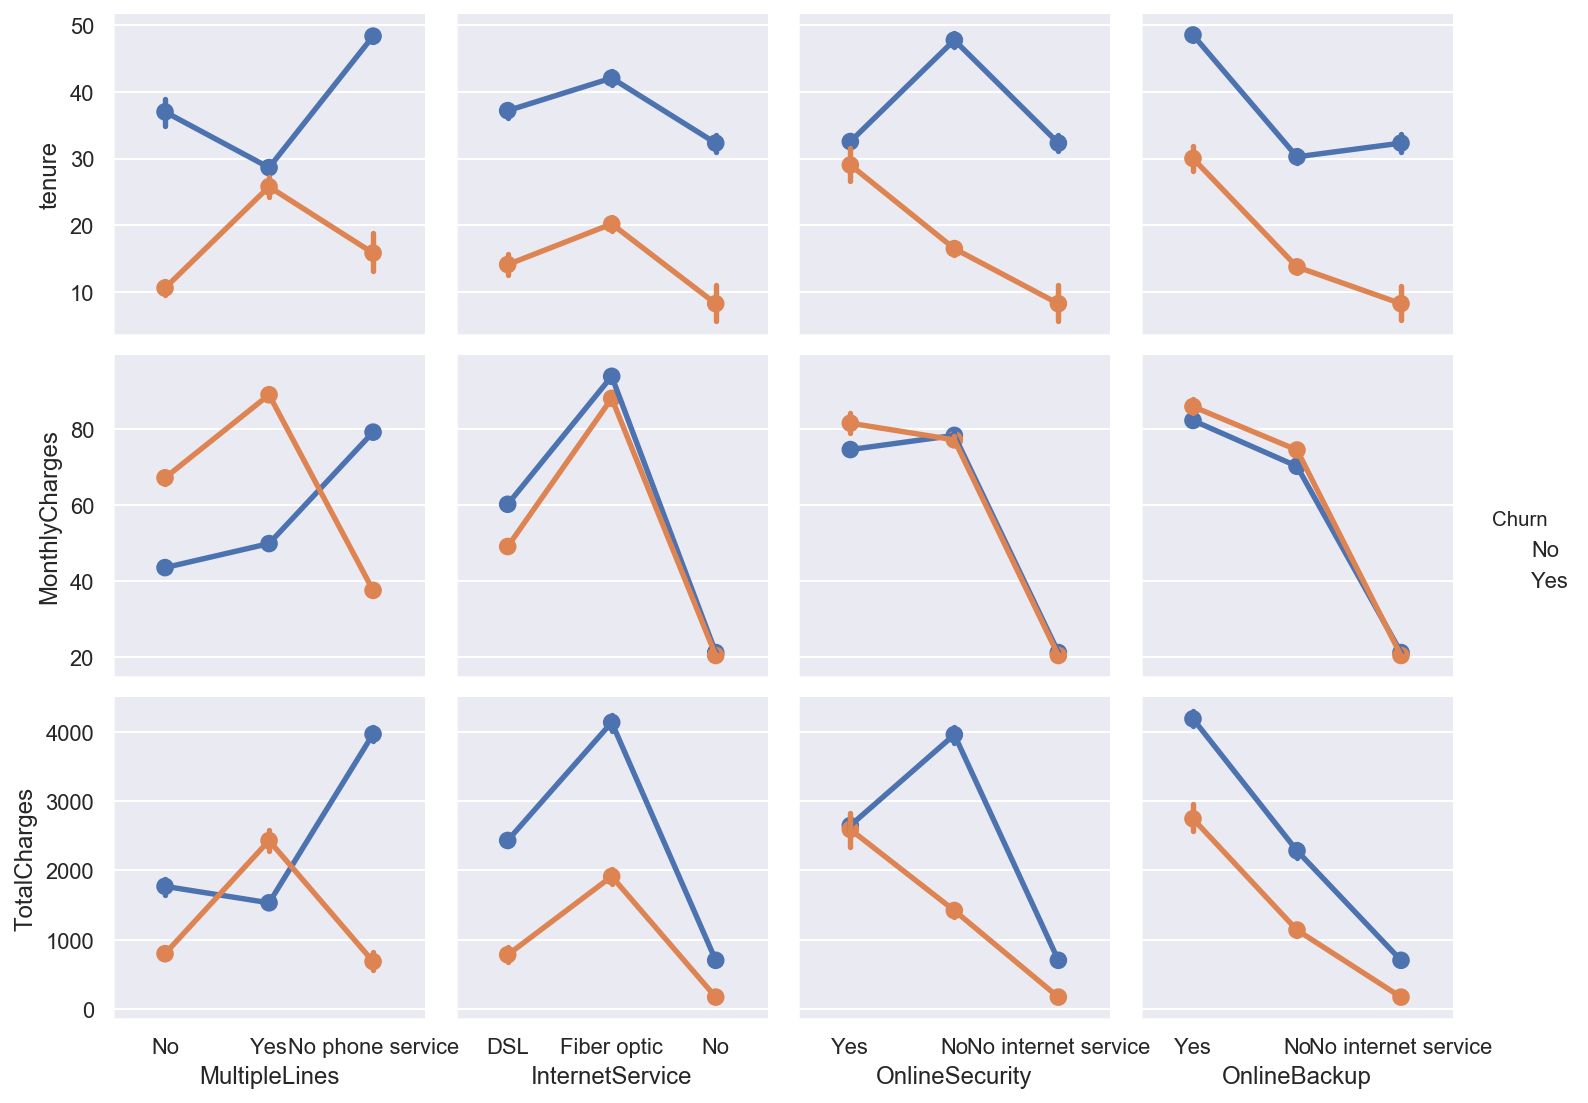

In [56]:
# x_vars=cat_cols[:4] => x 축에 4개만 그리도록 
g = sns.PairGrid(data=df, x_vars=cat_cols[:4], y_vars=num_cols, hue="Churn")
g.map(sns.pointplot)
g.add_legend()

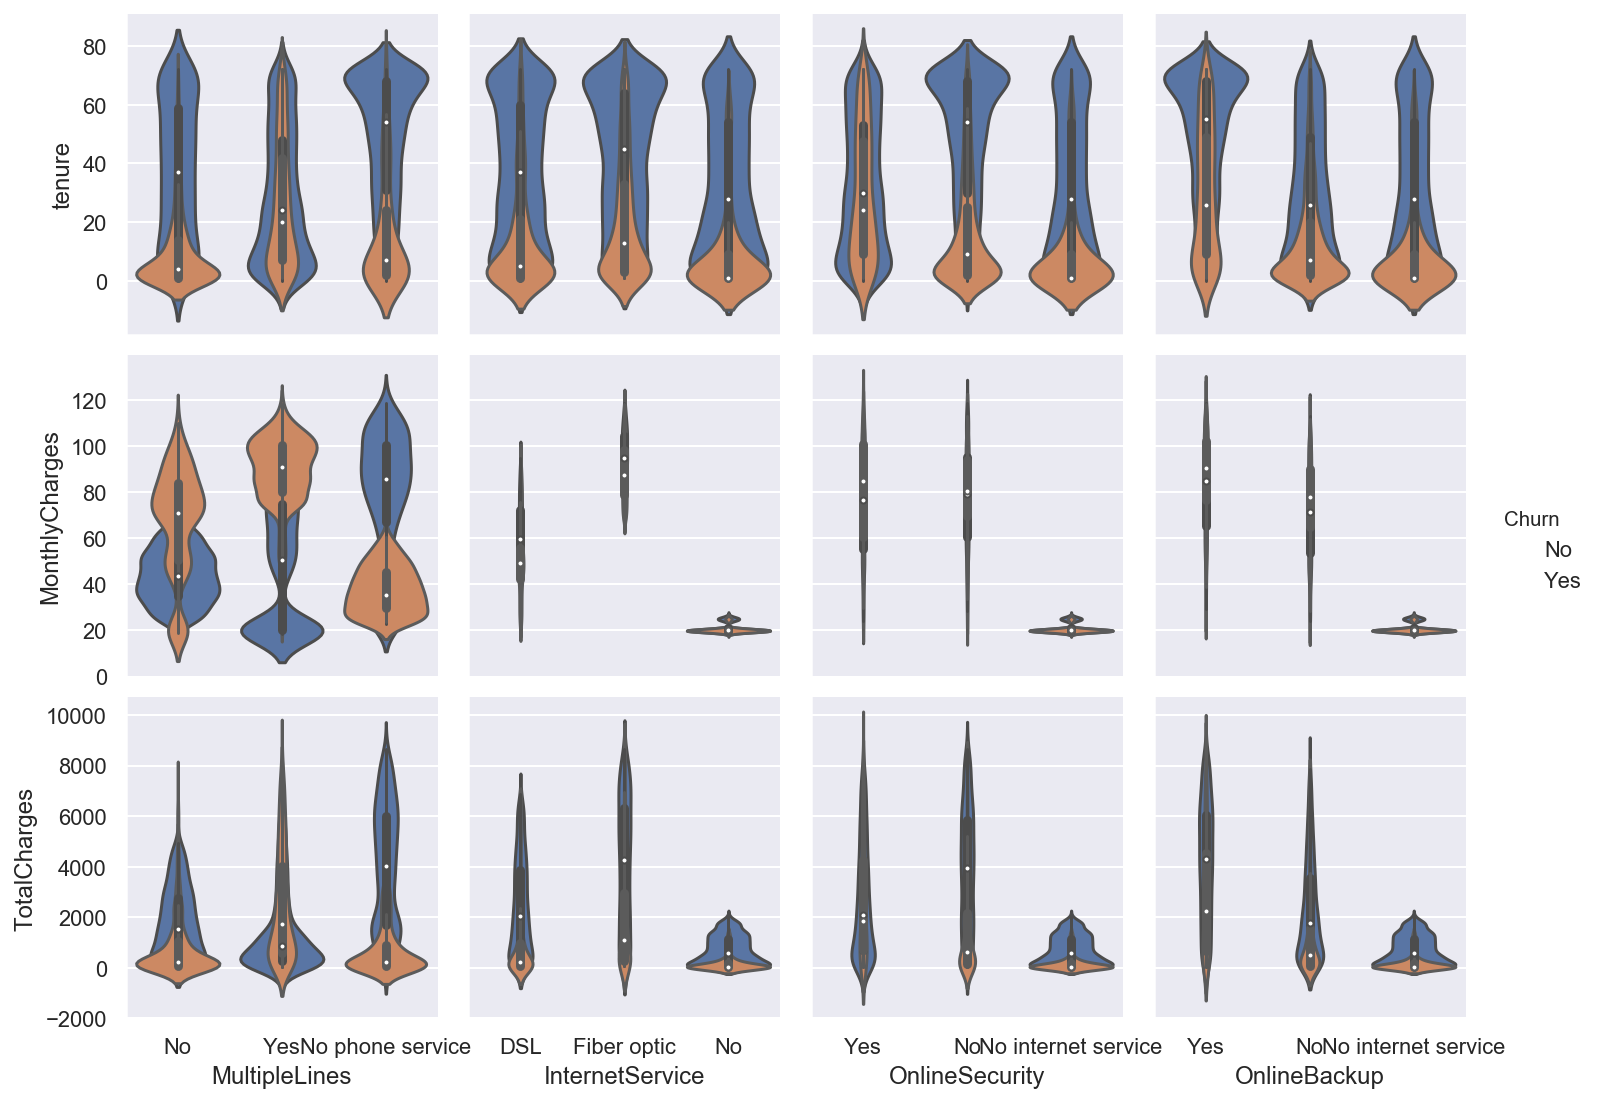

In [57]:
g = sns.PairGrid(data=df, x_vars=cat_cols[:4], y_vars=num_cols, hue="Churn")
g.map(sns.violinplot)
g.add_legend()

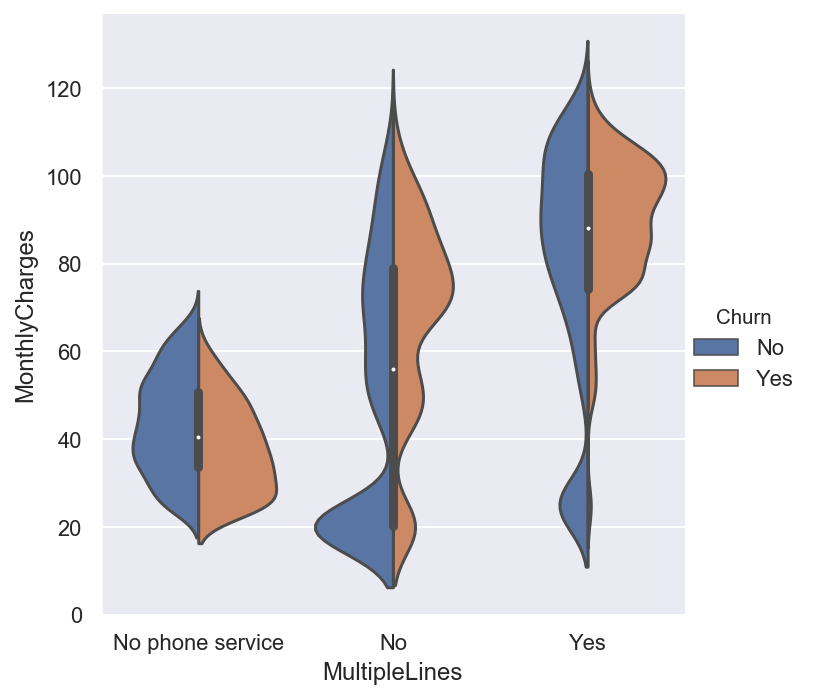

In [58]:
sns.catplot(data=df, x="MultipleLines", y="MonthlyCharges", hue="Churn", 
            kind="violin", split=True)

### binning

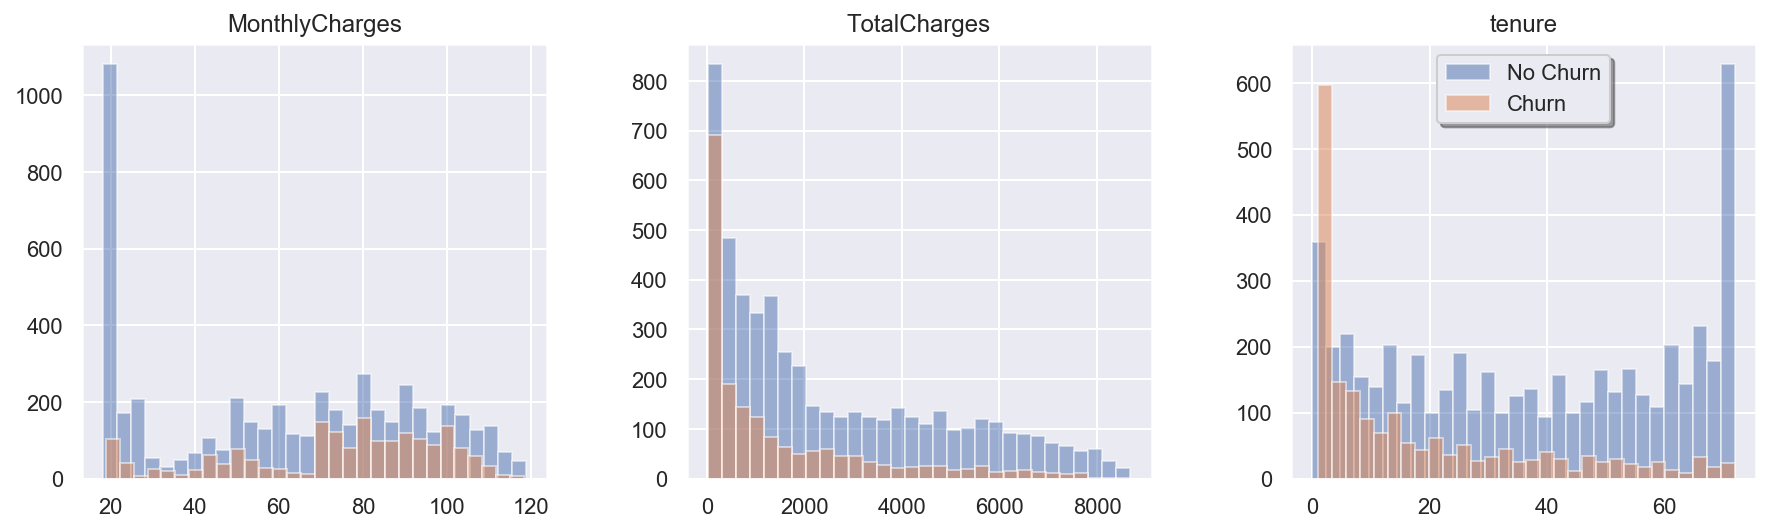

In [61]:
# 수치형 데이터의 경우 범위가 잘게 나누어져 있을 수록 과적합될 가능성이 있기 때문에, 히스토그램으로 확인 후 수치 범위를 나누는 "비닝" 작업을 해준다 
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
df.loc[df["Churn_bool"] == False, num_cols].hist(bins=30, alpha=.5, ax=axes)
df.loc[df["Churn_bool"] == True, num_cols].hist(bins=30, alpha=.5, ax=axes)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=9)

In [62]:
## MonthlyCharges 를 qcut을 통해 나눕니다.
pd.qcut(df["MonthlyCharges"], q=4, labels=["<35", "<70", "<89", "<119"])

0        <35
1        <70
2        <70
3        <70
4        <89
        ... 
7038     <89
7039    <119
7040     <35
7041     <89
7042    <119
Name: MonthlyCharges, Length: 7043, dtype: category
Categories (4, object): [<35 < <70 < <89 < <119]

In [64]:
# monthlycharges_split 을 30, 70, 100  범위로 나눕니다.
def monthlycharges_split(df) :   
    if df['MonthlyCharges'] <= 30 :
        return '0-30'
    elif (df['MonthlyCharges'] > 30) & (df['MonthlyCharges'] <= 70 ):
        return '30-70'
    elif (df['MonthlyCharges'] > 70) & (df['MonthlyCharges'] <= 99 ):
        return '70-99'
    elif df['MonthlyCharges'] > 99 :
        return '99plus'
    
df['monthlycharges_group'] = df.apply(monthlycharges_split, axis = 1) #apply 에 데이터프레임을 넣어주면, 꼭 axis 설정 필요! 
df[['MonthlyCharges','monthlycharges_group']]

,MonthlyCharges,monthlycharges_group
0,29.85,0-30
1,56.95,30-70
2,53.85,30-70
3,42.30,30-70
4,70.70,70-99
...,...,...
7038,84.80,70-99
7039,103.20,99plus
7040,29.60,0-30
7041,74.40,70-99


In [65]:
# TotalCharges 를 2000, 4000, 6000 으로 나눕니다.
# 아래의 함수를 해당 구간에 따라 나누도록 완성합니다.
def totalcharges_split(df) :   
    if df['TotalCharges'] <= 2000 :
        return '0-2k'
    elif df['TotalCharges'] > 2000 and df['TotalCharges']<= 4000 :
        return '2k-4k'
    elif df['TotalCharges'] > 4000 and df['TotalCharges']<= 6000 :
        return '4k-6k'
    else : 
        return '6kplus'
    

df['totalcharges_group'] = df.apply(totalcharges_split, axis = 1)
df[['TotalCharges', 'totalcharges_group']].head()

,TotalCharges,totalcharges_group
0,29.85,0-2k
1,1889.50,0-2k
2,108.15,0-2k
3,1840.75,0-2k
4,151.65,0-2k


In [66]:
# tenure 를 20, 40, 60 으로 나눕니다.
def tenure_split(df) : 
    if df["tenure"] <= 20 :
        return "0-20"
    elif df["tenure"] > 20 and df["tenure"] >= 40 : 
        return "20-40"
    elif df["tenure"] > 40 and df["tenure"] <= 60 : 
        return "40-60"
    else :
        return "60plus"
    
df['tenure_group'] = df.apply(tenure_split, axis = 1)
df[["tenure", 'tenure_group']].head()

,tenure,tenure_group
0,1,0-20
1,34,60plus
2,2,0-20
3,45,20-40
4,2,0-20


### One Hot Encoding
* 범주형 데이터 => 수치형 데이터로 변환

In [67]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [70]:
bi_bool_cols = []

for col in bi_cols: 
    bi_bool_cols.append(f"{col}_bool")
    print (f"{col}_bool")

bi_bool_cols

gender_bool
SeniorCitizen_bool
Partner_bool
Dependents_bool
PhoneService_bool
PaperlessBilling_bool
Churn_bool


['gender_bool',
 'SeniorCitizen_bool',
 'Partner_bool',
 'Dependents_bool',
 'PhoneService_bool',
 'PaperlessBilling_bool',
 'Churn_bool']

In [69]:
cols = df.columns.tolist()
cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'gender_bool',
 'Partner_bool',
 'Dependents_bool',
 'PhoneService_bool',
 'PaperlessBilling_bool',
 'Churn_bool',
 'monthlycharges_group',
 'totalcharges_group',
 'tenure_group']

In [71]:
multi_cols = set(cols) - set(bi_cols) - set(num_cols) - set(bi_bool_cols)
multi_cols = list(multi_cols)
multi_cols.remove("customerID")
multi_cols

['OnlineBackup',
 'StreamingMovies',
 'tenure_group',
 'DeviceProtection',
 'PaymentMethod',
 'StreamingTV',
 'OnlineSecurity',
 'MultipleLines',
 'totalcharges_group',
 'monthlycharges_group',
 'InternetService',
 'TechSupport',
 'Contract']

In [72]:
pd.options.display.max_columns = 55

In [78]:
d_cols = set(cols) - set(bi_cols)
d_cols = list(d_cols)
df[d_cols]

,customerID,Dependents_bool,PhoneService_bool,tenure,StreamingMovies,tenure_group,gender_bool,monthlycharges_group,PaperlessBilling_bool,MonthlyCharges,Churn_bool,StreamingTV,totalcharges_group,InternetService,Contract,OnlineBackup,TotalCharges,Partner_bool,DeviceProtection,PaymentMethod,OnlineSecurity,MultipleLines,TechSupport
0,7590-VHVEG,False,False,1,No,0-20,False,0-30,True,29.85,False,No,0-2k,DSL,Month-to-month,Yes,29.85,True,No,Electronic check,No,No phone service,No
1,5575-GNVDE,False,True,34,No,60plus,True,30-70,False,56.95,False,No,0-2k,DSL,One year,No,1889.50,False,Yes,Mailed check,Yes,No,No
2,3668-QPYBK,False,True,2,No,0-20,True,30-70,True,53.85,True,No,0-2k,DSL,Month-to-month,Yes,108.15,False,No,Mailed check,Yes,No,No
3,7795-CFOCW,False,False,45,No,20-40,True,30-70,False,42.30,False,No,0-2k,DSL,One year,No,1840.75,False,Yes,Bank transfer (automatic),Yes,No phone service,Yes
4,9237-HQITU,False,True,2,No,0-20,False,70-99,True,70.70,True,No,0-2k,Fiber optic,Month-to-month,No,151.65,False,No,Electronic check,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,True,True,24,Yes,60plus,True,70-99,True,84.80,False,Yes,0-2k,DSL,One year,No,1990.50,True,Yes,Mailed check,Yes,Yes,Yes
7039,2234-XADUH,True,True,72,Yes,20-40,False,99plus,True,103.20,False,Yes,6kplus,Fiber optic,One year,Yes,7362.90,True,Yes,Credit card (automatic),No,Yes,No
7040,4801-JZAZL,True,False,11,No,0-20,False,0-30,True,29.60,False,No,0-2k,DSL,Month-to-month,No,346.45,True,No,Electronic check,Yes,No phone service,No
7041,8361-LTMKD,False,True,4,No,0-20,True,70-99,True,74.40,True,No,0-2k,Fiber optic,Month-to-month,No,306.60,True,No,Mailed check,No,Yes,No


In [79]:
# 바이너리 데이터를 제외한 범주형 컬럼을 인코딩
df_feature = pd.get_dummies(data = df[d_cols], columns = multi_cols)
df_feature

,customerID,Dependents_bool,PhoneService_bool,tenure,gender_bool,PaperlessBilling_bool,MonthlyCharges,Churn_bool,TotalCharges,Partner_bool,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure_group_0-20,tenure_group_20-40,tenure_group_60plus,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,totalcharges_group_0-2k,totalcharges_group_2k-4k,totalcharges_group_4k-6k,totalcharges_group_6kplus,monthlycharges_group_0-30,monthlycharges_group_30-70,monthlycharges_group_70-99,monthlycharges_group_99plus,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,False,False,1,False,True,29.85,False,29.85,True,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,False,True,34,True,False,56.95,False,1889.50,False,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2,3668-QPYBK,False,True,2,True,True,53.85,True,108.15,False,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,False,False,45,True,False,42.30,False,1840.75,False,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
4,9237-HQITU,False,True,2,False,True,70.70,True,151.65,False,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,True,True,24,True,True,84.80,False,1990.50,True,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
7039,2234-XADUH,True,True,72,False,True,103.20,False,7362.90,True,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
7040,4801-JZAZL,True,False,11,False,True,29.60,False,346.45,True,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
7041,8361-LTMKD,False,True,4,True,True,74.40,True,306.60,True,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0


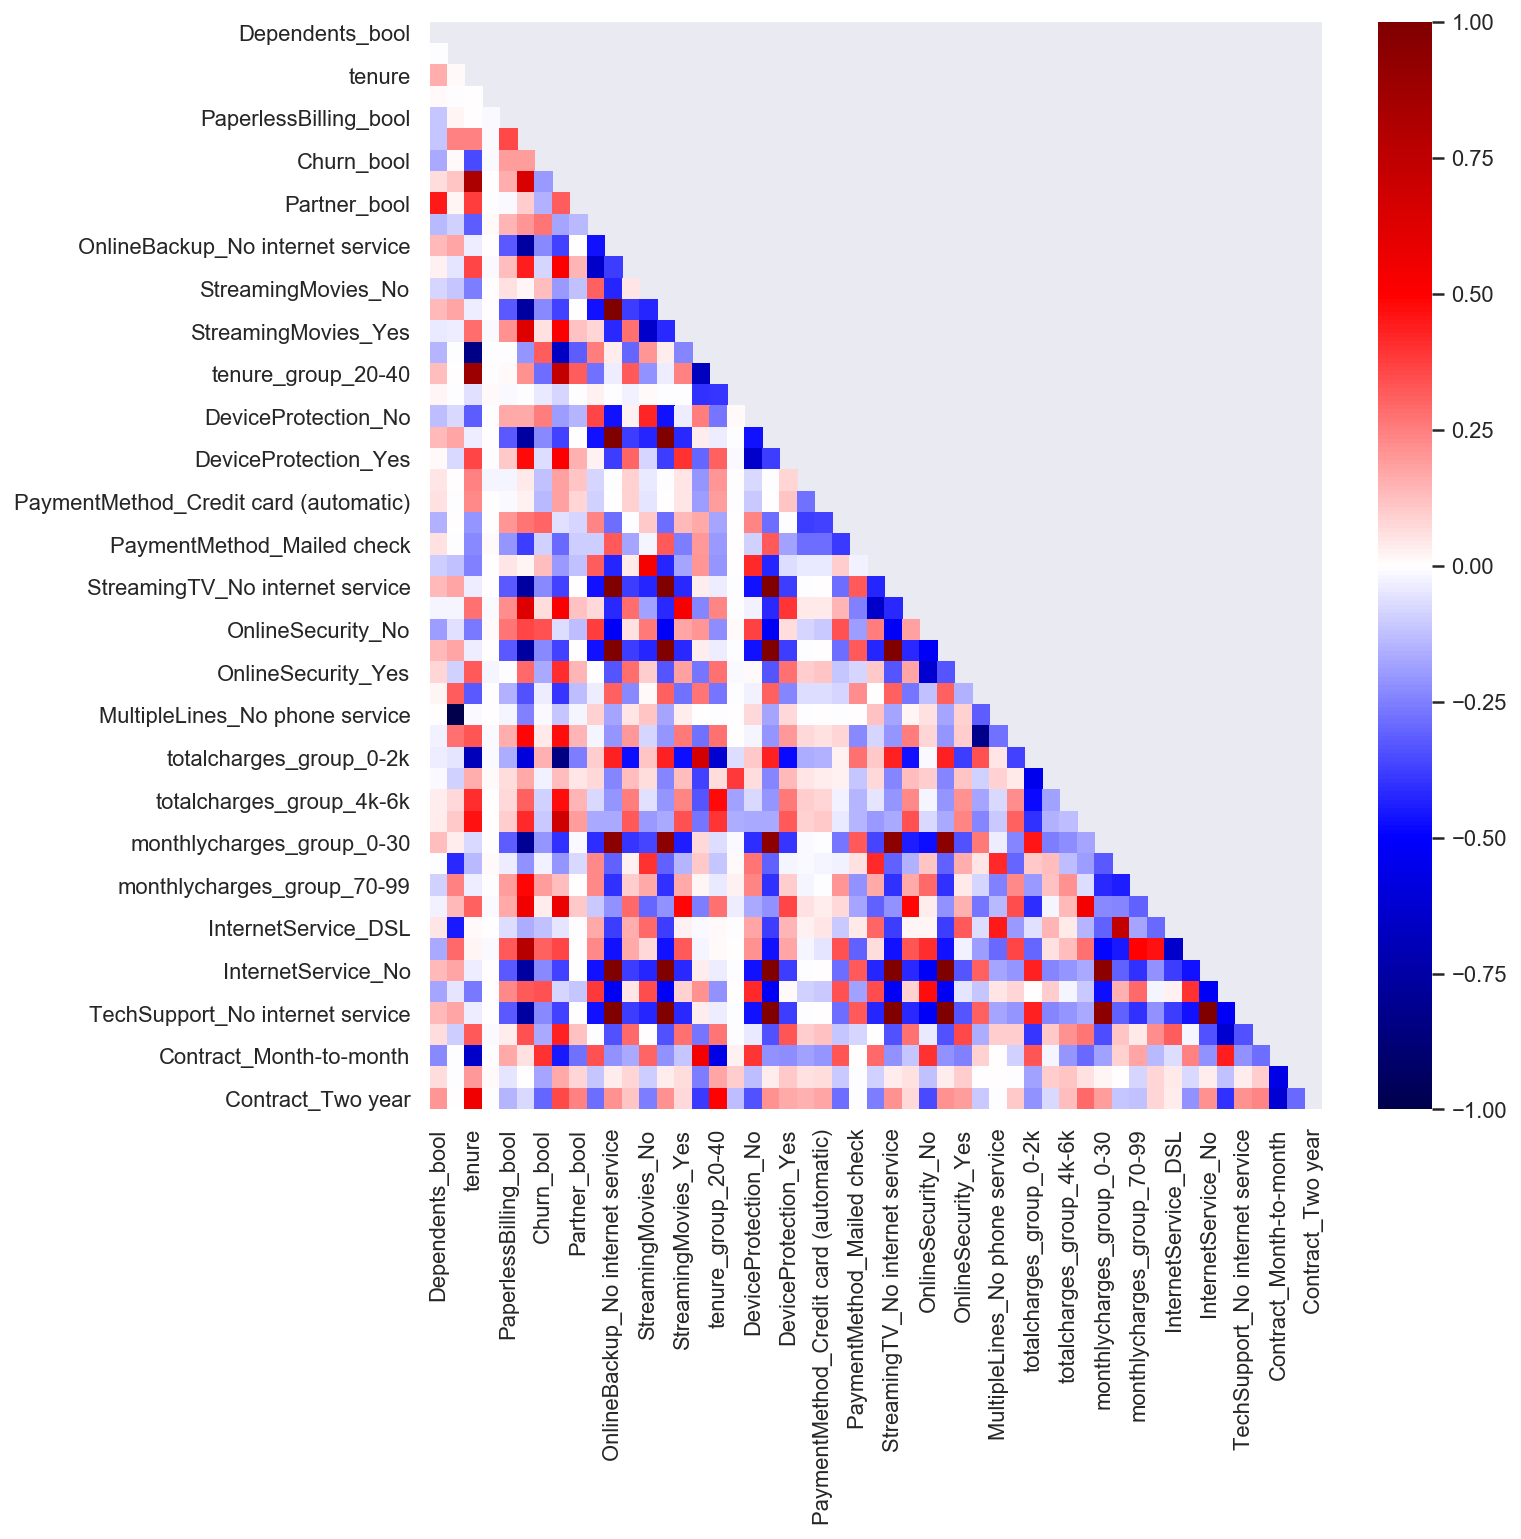

In [81]:
corr = df_feature.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="seismic", vmin=-1, vmax=1, mask = mask)

In [82]:
feature_cols = df_feature.columns.tolist()
for ncol in num_cols:
    feature_cols.remove(ncol)

feature_cols

['customerID',
 'Dependents_bool',
 'PhoneService_bool',
 'gender_bool',
 'PaperlessBilling_bool',
 'Churn_bool',
 'Partner_bool',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'tenure_group_0-20',
 'tenure_group_20-40',
 'tenure_group_60plus',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'totalcharges_group_0-2k',
 'totalcharges_group_2k-4k',
 'totalcharges_group_4k-6k',
 'totalcharges_group_6kplus',
 'monthlycharges_group_0-30',
 'monthlyc

In [83]:
df_feature = df_feature[feature_cols]

In [84]:
# csv 파일로 저장합니다.
df_feature.to_csv("telco_feature.csv", index=False)

In [85]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv("telco_feature.csv")

,customerID,Dependents_bool,PhoneService_bool,gender_bool,PaperlessBilling_bool,Churn_bool,Partner_bool,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure_group_0-20,tenure_group_20-40,tenure_group_60plus,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,totalcharges_group_0-2k,totalcharges_group_2k-4k,totalcharges_group_4k-6k,totalcharges_group_6kplus,monthlycharges_group_0-30,monthlycharges_group_30-70,monthlycharges_group_70-99,monthlycharges_group_99plus,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,False,False,False,True,False,True,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,False,True,True,False,False,False,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2,3668-QPYBK,False,True,True,True,True,False,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,False,False,True,False,False,False,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
4,9237-HQITU,False,True,False,True,True,False,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,True,True,True,True,False,True,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
7039,2234-XADUH,True,True,False,True,False,True,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
7040,4801-JZAZL,True,False,False,True,False,True,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
7041,8361-LTMKD,False,True,True,True,True,True,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
